In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ease_of_live_scripts as es
from sympy import *
from IPython.display import display, Latex
from scipy import optimize as fit
from pprint import *
import seaborn as sbs
import winsound
sbs.set()


In [ ]:
pname=['s', 'A', 'z', 'd', 'wl', 'L', 'n', 'offset']
z=0.84
d=4.0e-5
L=10.0e-5
A=4
wl=(6.328*(10**(-7)))
n=10
offset=+0.005
s=0.0005
def model_integrate(xdata,model,s,*args):
    ydata=np.zeros(len(xdata))
    for i in range(len(xdata)):
        ydata[i]=np.sum(model(np.linspace(xdata[i]-s,xdata[i]+s,1000),*args)*(s/1000))
    return ydata
def newmodel(x,s,*args):
    return model_integrate(x,es.n_slits_model,s,*args)

data=es.read('exp1125/original parameters/10 lines per millimiters','sweep2.txt')
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle'])))) #x data agusted for distortion
ydata=-data['power']
plt.plot(xdata,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata,ydata,[s, A, z, d, wl, L, n, offset],
                         bounds=((0     ,0     ,z-0.001*z,d-0.01*d,wl-wl*0.001,L-L*0.01,n-n/2,-np.inf),
                                 (5    ,np.inf,z+0.001*z,d+0.01*d,wl+wl*0.001,L+L*0.01,n+n/2,np.inf)))
plt.plot(xdata,newmodel(xdata,popt[0],*popt[1:]),zorder=1,color=sbs.color_palette()[3])
# plt.plot(xdata,newmodel(xdata,s,*[A, z, d, wl, L, n, offset]),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata,ydata,newmodel,popt)))

In [ ]:
def model_integrate(xdata,model,s,*args):
    ydata=np.zeros(len(xdata))
    for i in range(len(xdata)):
        ydata[i]=np.average(model(np.linspace(xdata[i]-s,xdata[i]+s,1000),*args))
    return ydata
def newmodel(x,s,*args):
    return model_integrate(x,es.n_slits_model,s,*args)
plt.plot(xdata,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])

s=0.0005806150260206035
A=4.784985756434743
z=0.8404798789430529
d=3.9736736171749734e-05
wl=6.332016435415973e-07
L=9.994032286487274e-05
n=9.999943352078985
offset=0.004934551042157292
plt.plot(xdata,newmodel(xdata,s,*[A, z, d, wl, L, n, offset]),zorder=1,color=sbs.color_palette()[3])
plt.show()

In [ ]:
x,A,z,wl,L,offset,n,d=symbols('x,A,z,lambda,L,x0,n,d')
xd,xd0=symbols("x_d,x0_d")
xL,xL0=symbols("x_L,x0_L")
xn,xn0=symbols("x_n,x0_n")
p2=symbols('p2')
pn=symbols('p_n')
pL=symbols('p_L')
display(Latex(r"$$x_d= \frac{\pi d}{\lambda z}x$$"))
# display(Latex(r"$$x_L= \frac{\pi L}{\lambda z}x$$"))
# display(Latex(r"$$x_n= \frac{\pi L(2n+1)}{\lambda z}x$$"))
display(Latex(r"$$p_2=\frac{A d^2}{\lambda z}$$"))
display(Latex(r"$$p_n=\frac{L(2n+1)}{d}$$"))
display(Latex(r"$$p_L=\frac{L}{d}$$"))
display(Latex("$${}$$".format(latex(A * (2 * z * csc(((2 * pi / wl) * L * (x - offset)) / (2 * z)) ** 2 * sin(
        (d * (2 * pi / wl) * (x - offset)) / (2 * z)) ** 2 * sin(
        ((2 * pi / wl) * L * (1 + 2 * n) * (x - offset)) / (2 * z)) ** 2) / (
                   (2 * pi / wl) * pi * (x - offset) ** 2)))))
display(Latex("$${}$$".format(latex(p2 * (csc(pL*(xd-xd0)) ** 2 * sin(pn*(xd-xd0)) ** 2 * sin(xd-xd0) ** 2) / ((xd - xd0) ** 2)))))

In [ ]:

pname=['s', 'p2', 'pL', 'pn', 'xd0']
z=0.85
d=4.49e-5
L=6.74e-5
A=50
wl=(6.328*(10**(-7)))
n=100#probobly 14 might me 24 but most likely not
offset=0
s=5.0e-5
p2, pL, pn, xd0=[A*d**2/(wl*z),L/d,L*((2*n)+1)/d,np.pi*d*offset/(wl*z)]
def model_integrate(xdata,model,s,*args):
    ydata=np.zeros(len(xdata))
    for i in range(len(xdata)):
        ydata[i]=np.sum(model(np.linspace(xdata[i]-s,xdata[i]+s,100),*args)*(s/100))
    return ydata
def newmodel(x,s,*args):
    return model_integrate(x,es.n_slits_model_reduced,s,*args)# xd, p2, pL, pn, xd0

data=es.read('exp1125/original parameters/10 lines per millimiters','sweep2.txt')
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle'])))) #x data agusted for distortion
ydata=-data['power']
plt.plot(xdata,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata,ydata,[s, p2, pL, pn, xd0],bounds=((0,0,0,0,-np.inf),
                                                                           (np.inf,np.inf,np.inf,np.inf,np.inf)))
plt.plot(xdata,newmodel(xdata,*popt),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata,ydata,newmodel,popt)))
ring()

In [ ]:
def model_integrate(xdata,model,s,*args):
    q=1000
    ydata=np.zeros(len(xdata))
    for i in range(len(xdata)):
        ydata[i]=np.sum(model(np.linspace(xdata[i]-s,xdata[i]+s,q),*args)*(2*s/q))
    return ydata
def newmodel(x,s,*args):
    return model_integrate(x,es.n_slits_model_reduced,s,*args)# xd, p2, pL, pn, xd0


z=0.85
d=4.49e-5
L=6.74e-5
A=50
wl=(6.328*(10**(-7)))
n=24#probobly 14 might me 24 but most likely not
offset=0
s=5.0e-5


p2, pL, pn, xd0=[A*d**2/(wl*z*L),L/d,L*((2*n)+1)/d,np.pi*d*offset/(wl*z)]
xdata=np.linspace(-10,10,20000)
plt.plot(xdata,newmodel(xdata,*[s, p2, pL, pn, xd0]),zorder=1,color=sbs.color_palette()[3])
plt.show()

In [ ]:
z=0.85

import os
wlk=os.walk('exp1202/n slits')
for folder in es.list_folders('exp1202/n slits'):
    for file in es.list_files(str(os.path.join('exp1202/n slits',str(folder)))):
        path=os.path.join('exp1202/n slits',folder)
        data=es.read(path,file)
        xdata=z*np.sin(np.deg2rad(es.volt_to_angle(data['angle'])))
        ydata=-data['power']
        plt.figure()
        plt.plot(xdata,ydata,'.',markersize=1,color=sbs.color_palette()[7])
        plt.title(str(os.path.join(folder,file)))
plt.show()

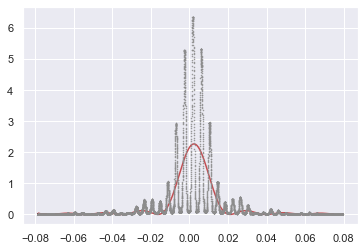

In [4]:
def newmodel(x,s,*args):
    return es.model_integrate(x,es.n_slits_model_reduced,s,*args)

z=0.85
d=4.49e-5
L=6.74e-5
A=50
wl=(6.328*(10**(-7)))
n=24#probobly 14 might me 24 but most likely not
offset=0
s=5.0e-5
p2, pL, pn, xd0=[A*d**2/(wl*z*L),L/d,L*((2*n)+1)/d,np.pi*d*offset/(wl*z)]

data=es.read('exp1202/n slits/8 per mm','sweep 1.txt')
xdata=z*np.sin(np.deg2rad(es.volt_to_angle(data['angle'])))
ydata=-data['power']
plt.plot(xdata,ydata,'.',markersize=1,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata,ydata,[s, p2, pL, pn, xd0],bounds=((0,0,0,0,-np.inf),
                                                                           (np.inf,np.inf,np.inf,np.inf,np.inf)))
plt.plot(xdata,newmodel(xdata,*popt),zorder=1,color=sbs.color_palette()[3])
plt.show()